In [2]:
!pip install diffusers transformers accelerate torch safetensors


In [3]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image
import matplotlib.pyplot as plt


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [5]:
output_dir = "synthetic_dataset"
os.makedirs(output_dir, exist_ok=True)


In [6]:
prompts = [
    "A futuristic smart city at night",
    "A peaceful village in the mountains",
    "A robot studying in a classroom",
    "A cyberpunk street with neon lights",
    "An astronaut walking on Mars"
]


In [7]:
generated_images = []

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image_path = f"{output_dir}/image_{i+1}.png"
    image.save(image_path)
    generated_images.append(image)

print("✅ Synthetic images generated and saved successfully.")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Synthetic images generated and saved successfully.


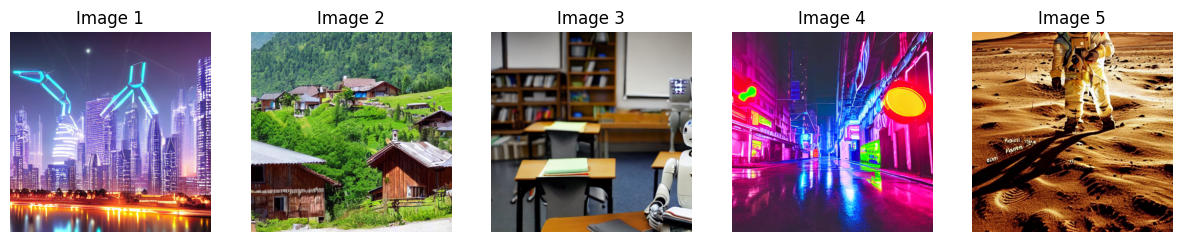

In [8]:
plt.figure(figsize=(15,5))

for i, img in enumerate(generated_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.show()


In [9]:
!zip -r synthetic_dataset.zip synthetic_dataset


  adding: synthetic_dataset/ (stored 0%)
  adding: synthetic_dataset/image_3.png (deflated 0%)
  adding: synthetic_dataset/image_2.png (deflated 0%)
  adding: synthetic_dataset/image_4.png (deflated 0%)
  adding: synthetic_dataset/image_1.png (deflated 0%)
  adding: synthetic_dataset/image_5.png (deflated 0%)
